In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
c:\users\aditya\miniconda3\envs\py36\lib\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


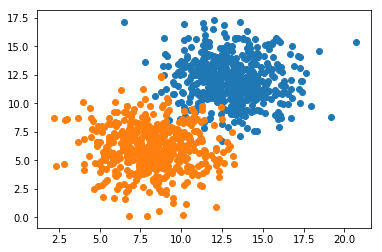

In [20]:
n_pts = 500
np.random.seed(42)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [21]:
model = Sequential()
model.add(Dense(units = 1, input_shape = (2,), activation='sigmoid'))
adam = Adam(lr = 0.1)
model.compile(adam, loss='binary_crossentropy', metrics = ['accuracy'])
h = model.fit(x=X, y=y, verbose = 1, batch_size = 50, epochs = 50, shuffle = True)

Epoch 1/50
1000/1000 [==============================] - 0s 118us/step - loss: 1.8367 - acc: 0.4520
Epoch 2/50
1000/1000 [==============================] - 0s 51us/step - loss: 0.8147 - acc: 0.5580
Epoch 3/50
1000/1000 [==============================] - 0s 40us/step - loss: 0.4254 - acc: 0.8910
Epoch 4/50
1000/1000 [==============================] - 0s 34us/step - loss: 0.3443 - acc: 0.9190
Epoch 5/50
1000/1000 [==============================] - 0s 32us/step - loss: 0.3042 - acc: 0.9330
Epoch 6/50
1000/1000 [==============================] - 0s 36us/step - loss: 0.2747 - acc: 0.9450
Epoch 7/50
1000/1000 [==============================] - 0s 41us/step - loss: 0.2484 - acc: 0.9580
Epoch 8/50
1000/1000 [==============================] - 0s 35us/step - loss: 0.2279 - acc: 0.9590
Epoch 9/50
1000/1000 [==============================] - 0s 36us/step - loss: 0.2114 - acc: 0.9600
Epoch 10/50
1000/1000 [==============================] - 0s 34us/step - loss: 0.2003 - acc: 0.9630
Epoch 11/50
1000/1

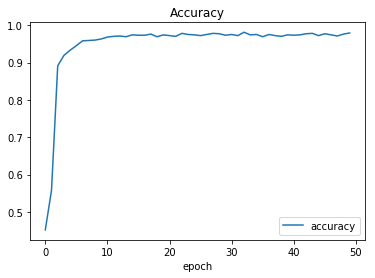

In [22]:
plt.plot(h.history['acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

In [23]:
h

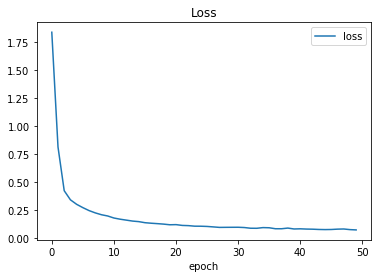

In [24]:
plt.plot(h.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [25]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1, 50)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1, 50)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

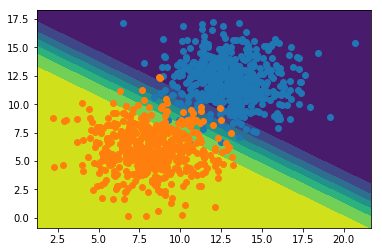

In [26]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

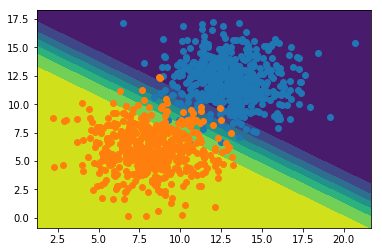

In [27]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [30]:
x = 9.2
y = 10.0

prediction is:  [[0.4820515]]


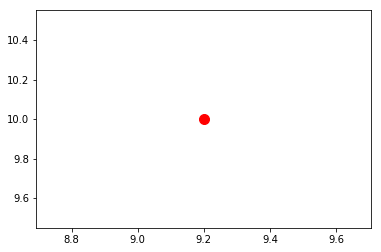

In [31]:
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("prediction is: ",prediction)